### Importing necessary libraries

In [1]:
#for data manipulation
import pandas as pd

#for mathematical operations
import numpy as np

#for data visualization
from matplotlib import pyplot as plt
import seaborn as sns


#for data preprocessing 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


#for modeling
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score , validation_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#for evaluation
from sklearn.metrics import mean_absolute_error, r2_score, classification_report,confusion_matrix , accuracy_score, f1_score

import time
import warnings
warnings.simplefilter('ignore')

### Import Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### Data Exploration

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**The goal of this Project is : given some features of a house ( LotFrontage, LotArea, Alley ... ), the model will predict the Sale Price of the house.**

**It's a Regression Problem ( Prediction of a value ), and we'll use Machine Learning to tackle it.**

In [5]:
#train set info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.shape

(1460, 81)

In [7]:
#To see statistics about Numerical features
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
pd.set_option('display.max_rows', 81)

In [9]:
#this function gives us the number of missing values in each column

def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum().sort_values(ascending=False)
    b['dtype'] = df.dtypes
    return b
basic_details(train)

,Missing value,dtype
PoolQC,1453,object
MiscFeature,1406,object
Alley,1369,object
Fence,1179,object
FireplaceQu,690,object
LotFrontage,259,float64
GarageCond,81,object
GarageType,81,object
GarageYrBlt,81,float64
GarageFinish,81,object


In [10]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)

In [11]:
total=train.shape[0]
missing=missing/total
missing

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

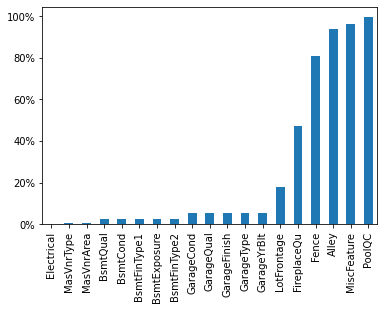

In [12]:
import matplotlib.ticker as mtick
ax = missing.plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

**As we can see, 'PoolQC', 'MiscFeature' , 'Alley', 'Fence' 'FireplaceQu' and others have NaN values. For now, we'll drop the 1st four features since most than half (more than 80%) of their values are NaN which makes them uselesss for Prices Prediction.**

In [13]:
#drop duplicate rows (if existing) since they're pretty much useless
train.drop_duplicates(keep='first', inplace=True)

In [14]:
#Alley, MiscFeature, PoolQC and Fence have a lot of NaN values ( more than 80% of the total of values )
train=train.drop(['Id','MiscFeature','PoolQC','Fence','Alley'], axis=1)
test=test.drop(['MiscFeature','PoolQC','Fence','Alley'], axis=1)

In [15]:
print((train['PoolArea']==0).count())
train=train.drop('PoolArea', axis=1)
test=test.drop('PoolArea', axis=1)

1460


**Since, all of 'PoolArea''s values are equal to 0, this feature's presence won't affect the model's performance.So Dropped it.**

In [16]:
#we'll need id feature for submission, so we'll save it in a variable
test_id=test.Id

### Data Visualization

*We always start by visualiazing the distribution of the target feature 'SalePrice'*

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

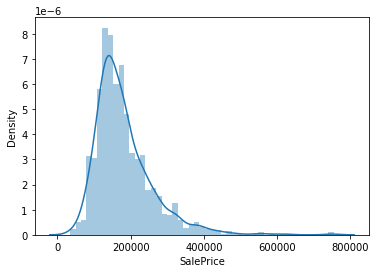

In [17]:
#we'll start with checking our target's distribution 
sns.distplot(train['SalePrice'])

The target variable is right skewed/ not normally distributed.

Also, there are multiple outliers ( they lie above ~500,000.) We will eventually want to get rid of the them to get a normal distribution of the target variable.

To get more insights on the most suitable Regression Algorithm for solving this problem (linear, polynomial, ensemble .. ), we need to look at the distributions of the features by plotting them.

### Numerical features

**1. Distribution of the features**

In [18]:
#Now let's seperate Numerical features and Categorical features, then study each category independantly
Num_features  = train.select_dtypes(include=['int64','float64']) 
Cat_features =train.select_dtypes(include=['object'])

**Since we have a lot of numerical features, it will take us a considerable amount of time to plot each plot seperately. Thankfully, there's a function that plots them all in the same grid.**

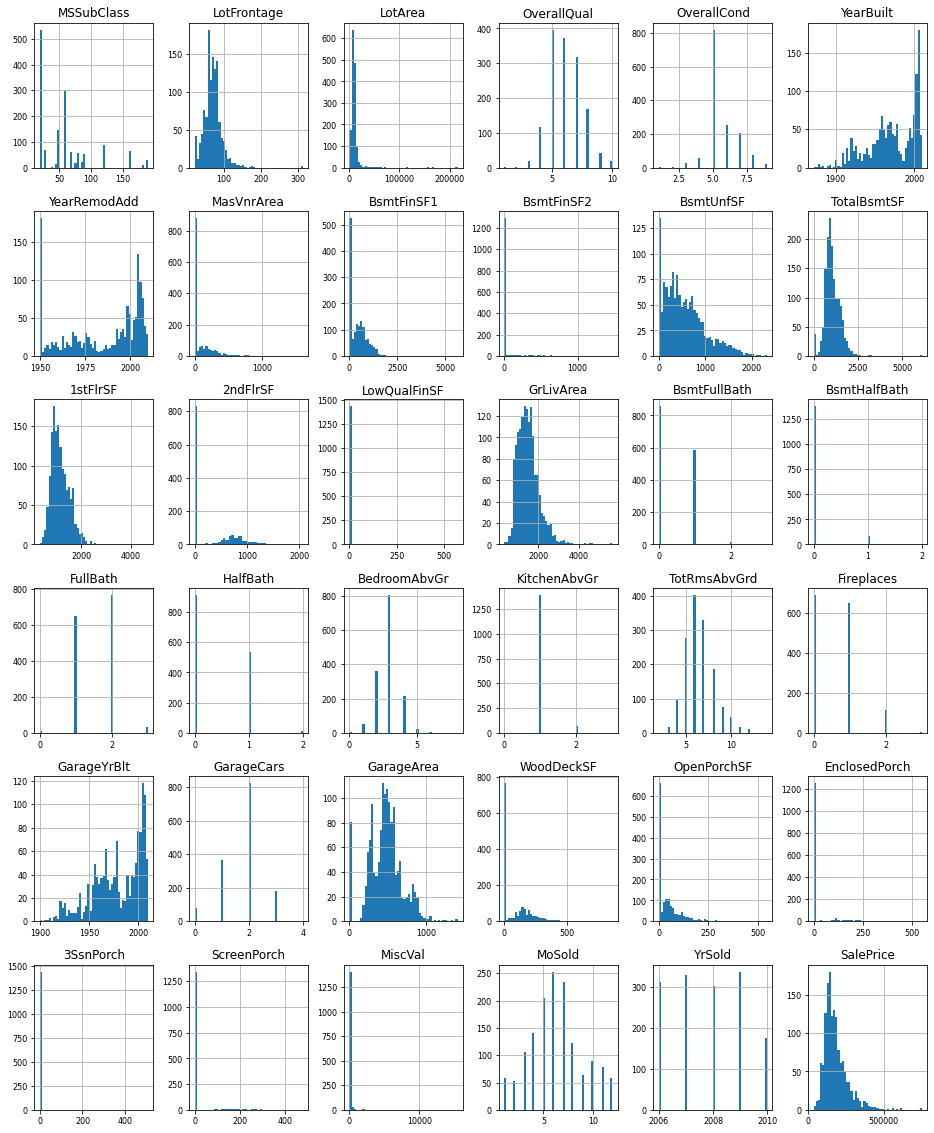

In [19]:
Num_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

**Overall remarks :**

- There are some features that have a similar distribution to our target feature ( LotFrontage, GarageArea .. )
- Some plots show very thin and distinct vertical lines even though these plots are supposed to show distribution of Numerical features ( continuous values )
- These plots correspond to features with low distinct values which makes their behaviour similar to categorical features

In [20]:
#let's take for 'example GarageCars'
train.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBa

'GarageCars' has only 5 distinct values.

**2. Correlation of these features with our target 'SalePrice'**

In [21]:
Num_corr = Num_features.corr()['SalePrice'][:-1]
golden_features_list = Num_corr[abs(Num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


As we can see there are some columns that are highly correlated with the target feature 'SalePrice'.

- OverallQual and GrLivArea are highly correlated with SalePrice. Let's look into them in more details.

**3. Relationship between some of the features ( Scatterplots ! )**

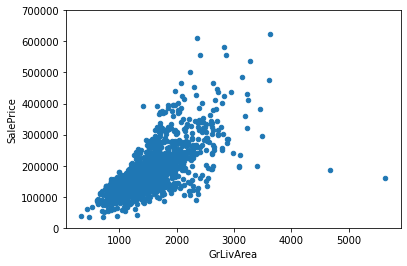

In [22]:
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,700000));

- Presence of two outliers ( area where GrLivArea > 4500 )

In [23]:
#process of checking the outliers
for i in train['GrLivArea']:
  if i>4500:
    print(i)
    df_new = train.query("GrLivArea=={}".format(i))
    print(i)
    print(df_new['SalePrice'])

4676
4676
523    184750
Name: SalePrice, dtype: int64
5642
5642
1298    160000
Name: SalePrice, dtype: int64


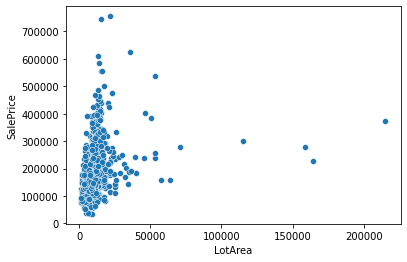

In [24]:
data = pd.concat([train['LotArea'], train['SalePrice']], axis=1)
sns.scatterplot(data=data, x='LotArea', y='SalePrice');

There are multiple outliers which can cause overfitting but at the same time outliers can hold valuable informations. That's why we can't decide yet if we should drop them all or not at this stage since we're not certain of their origin.

### Categorical Features

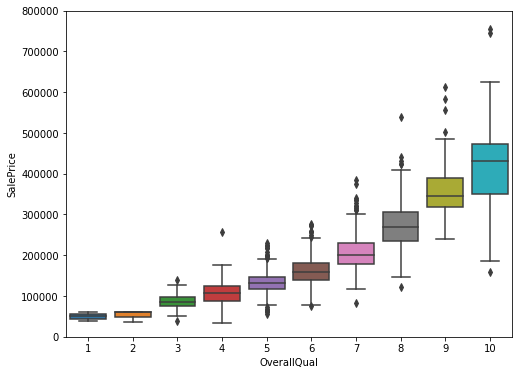

In [25]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

- The 'SalePrice' increases with the Overall Quality of the House.
- Presence of outliers ( especially when OverallQual is higher than 5 )

Here, we'll handle missing values :
- Non numerical features : Replace them with 'NONE'
- Numerical features : Impute

In [26]:
for c in Cat_features:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['NONE'])
        train[c] = train[c].fillna('NONE')

In [27]:
for c in Cat_features:
    test[c] = test[c].astype('category')
    if test[c].isnull().any():
        test[c] = test[c].cat.add_categories(['NONE'])
        test[c] = test[c].fillna('NONE')

Now, let's see distribution of all the categorical variables

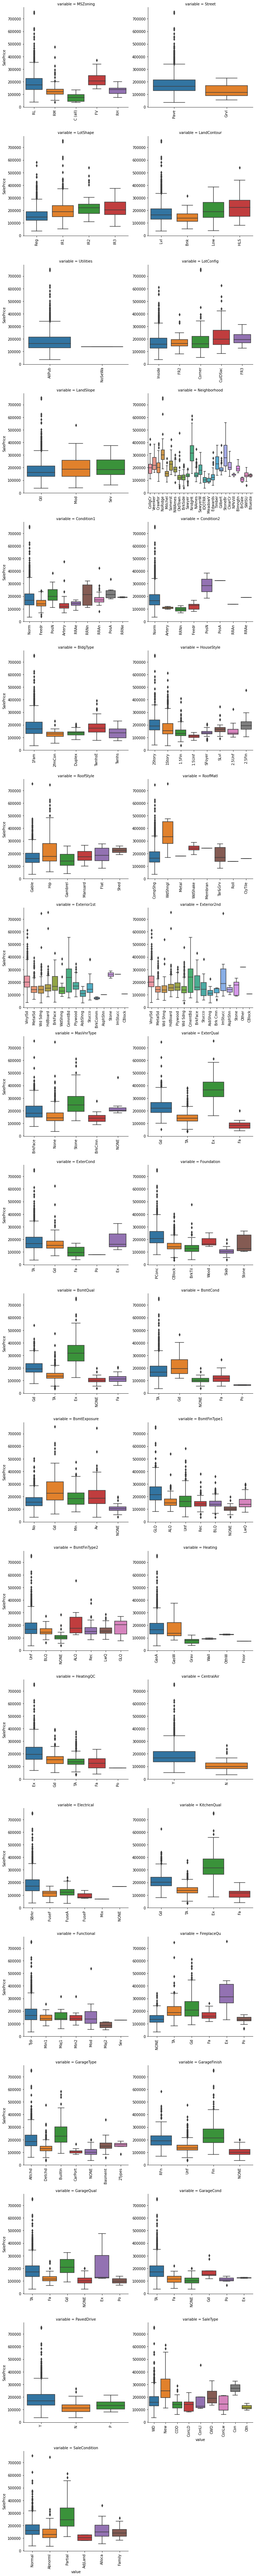

In [28]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars= Cat_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")


**Handling missing values :** We'll replace NaN values in each Numerical feature with the median of the values of that specific feature

In [29]:
#seperate target and features
X=train.drop("SalePrice", axis=1)
y=train.SalePrice

In [30]:
#Seperate Numerical Columns and Categorical columns 
Num_Col  = X.select_dtypes(include=['int64','float64']).columns 
Cat_Col  = X.select_dtypes(include=['object']).columns

In [31]:
from sklearn.impute import SimpleImputer
my_imputer= SimpleImputer(strategy='median')
X[Num_Col] = my_imputer.fit_transform(X[Num_Col])

test[Num_Col] = my_imputer.transform(test[Num_Col])

### Data Transformation / Feature Engineering

- *Standardize Numerical Features :* Here we picked standardization over normalization since there are a lot of outliers that can hold useful information and normalization tends to remove the impact of these outliers.

- *Encode Categorical Features :* Here we used Ordinal Encoding since One-Hot encoding takes a lot of Memory Space given the fact that we have a lot of categorical features.

In [32]:
Pipeline = ColumnTransformer([
    ('num', StandardScaler(), Num_Col),
    ('cat', OrdinalEncoder(),Cat_Col)
])

In [33]:
#train_val split
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size = 0.1,random_state = 42)

In [34]:
test=Pipeline.fit_transform(test)
test=pd.DataFrame(test)
test

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.874711,0.552396,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063378,0.517537,...,-0.988189,1.185921,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.092244,-0.038281,1.713905
1,-0.874711,0.601046,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063470,-0.297689,...,-0.988189,-0.741235,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,19.730438,-0.038281,1.713905
2,0.061351,0.260492,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773334,-0.297689,...,0.301406,0.042537,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.092244,-1.140614,1.713905
3,0.061351,0.455095,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357911,-0.297689,...,0.301406,-0.012788,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.092244,-0.038281,1.713905
4,1.465443,-1.247675,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.387213,-0.297689,...,0.301406,0.153187,-0.729632,0.489198,-0.360738,-0.088827,2.243060,-0.092244,-1.875504,1.713905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.401505,-2.317988,-1.591330,-1.447325,1.298950,-0.044694,-0.646813,-0.563316,-0.965288,-0.297689,...,-2.277784,-2.179687,-0.729632,-0.701628,-0.360738,-0.088827,-0.301543,-0.092244,-0.038281,-1.359958
1455,2.401505,-2.317988,-1.599808,-1.447325,-0.497418,-0.044694,-0.646813,-0.563316,-0.411391,-0.297689,...,-0.988189,-0.861106,-0.729632,-0.353093,-0.360738,-0.088827,-0.301543,-0.092244,-0.773170,-1.359958
1456,-0.874711,4.444441,2.055150,-0.751101,1.298950,-0.373861,0.584059,-0.563316,1.725069,-0.297689,...,0.301406,0.475916,2.982161,-0.701628,-0.360738,-0.088827,-0.301543,-0.092244,1.064053,-1.359958
1457,0.646389,-0.323315,0.125527,-0.751101,-0.497418,0.679475,0.394694,-0.563316,-0.224560,-0.297689,...,-2.277784,-2.179687,-0.103169,-0.236915,-0.360738,-0.088827,-0.301543,1.017827,0.329164,-1.359958


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1459 non-null   float64
 1   1       1459 non-null   float64
 2   2       1459 non-null   float64
 3   3       1459 non-null   float64
 4   4       1459 non-null   float64
 5   5       1459 non-null   float64
 6   6       1459 non-null   float64
 7   7       1459 non-null   float64
 8   8       1459 non-null   float64
 9   9       1459 non-null   float64
 10  10      1459 non-null   float64
 11  11      1459 non-null   float64
 12  12      1459 non-null   float64
 13  13      1459 non-null   float64
 14  14      1459 non-null   float64
 15  15      1459 non-null   float64
 16  16      1459 non-null   float64
 17  17      1459 non-null   float64
 18  18      1459 non-null   float64
 19  19      1459 non-null   float64
 20  20      1459 non-null   float64
 21  21      1459 non-null   float64
 22  

In [36]:
#Use the pipeline to transform the features

x_train = Pipeline.fit_transform(x_train)
x_val = Pipeline.transform(x_val) 

### Building our Model

- *1st approach :* 2 models in one

In [37]:
#Define models
names = ["Linear Regression","Random Forest Regressor"]
Regressors = [LinearRegression(), RandomForestRegressor() ]

In [38]:
for name, Reg in zip(names, Regressors):
  Reg.fit(x_train, y_train)
  preds = Reg.predict(x_val)
  MAE = mean_absolute_error(y_val,preds)
  R2 = r2_score(y_val,preds)
  print (name, ' : mean absolute error  :  ', "%.2f" %(MAE), '        R2_Score : ', "%.2f" %(R2))


Linear Regression  : mean absolute error  :   22149.95         R2_Score :  0.83
Random Forest Regressor  : mean absolute error  :   16403.19         R2_Score :  0.91


*Since it's a regression problem, we calculate error to evaluate the model's performance we picked RMSE as an evaluation metric.*

- *2nd approach :* Trying a boosting model ( good if the dataset contains outliers )

Let's try some other models, **GradientBoostingRegressor**

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [40]:
GBR.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=4)

In [41]:
#accuracy of the model
print(GBR.score(x_val, y_val)*100)

90.08737729552568


**XGBoostRegressor**

In [42]:
import xgboost
XGBR=xgboost.XGBRegressor()

In [43]:
XGBR.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
#accuracy of the model
print(XGBR.score(x_val, y_val)*100)

82.71084313041179


### Fine Tuning on Random Forest Regressor

ML Models have parameters and Hyperparameters, which are parameters that we can tweak / modify to improve the model's performance.

There are predefined techniques that search for the hyperparameters's values which are :

         - GridSearch 
         - RandomizedSearch 

In [45]:
#Initialize my gridsearch parameters
Grid_par = [
    {'n_estimators' : [5,10,20,30,50,100] , 'max_features' : [4,5,6]},
    {'bootstrap': [False], 'n_estimators' : [5,10,20,30,50,100] , 'max_features' : [4,5,6]},
    {'n_estimators' : [5,10,20,30,50,100] , 'max_features' : [2,3,4],'max_depth' : [10,20,30]},
    {'bootstrap': [False], 'n_estimators' : [5,10,20,30,50,100] , 'max_features' : [4,5,6],'max_depth' : [10,20,30]}]
    
model = RandomForestRegressor(n_jobs=-1)

In [46]:
#Randomized Search 
RandSearch = RandomizedSearchCV(estimator=model, param_distributions=Grid_par, cv = 5 ,
                               scoring='neg_mean_absolute_error', return_train_score=True,n_iter=20)

In [47]:
start = time.time()
RandSearch.fit(x_train,y_train)
end = time.time()

In [48]:
Randresult = RandSearch.cv_results_

In [49]:
best_rand = RandSearch.best_estimator_

In [50]:
best_rand.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features=6, n_jobs=-1)

In [51]:
rand_preds = best_rand.predict(x_val)

In [52]:
mean_absolute_error(y_val,rand_preds)

15978.926301369862

## Create-Submission

In [53]:
prediction=GBR.predict(test)

In [54]:
submit =pd.DataFrame({'Id':test_id, 'SalePrice':prediction})
submit.to_csv('submission_file2.csv' ,index=False)